In [42]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../code")
import algorithm_for_game
import read_data
import numpy as np
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parameters

### Current Required Parameters
* network_file: a tntp file with network information, including
    * number of nodes
    * number of arcs
    * arc set
    * travel time of each arc (free_flow_time)
* origin node list
* destination node list
* demand of each origin
* trust of each origin
* threshold of trusting dangerous reports
* number of dangerous reports of each arc

In [31]:
# for sioux falls, read all the files
net_file_name = '../TransportationNetworks/SiouxFalls/SiouxFalls_net.tntp'
num_nodes, num_arcs, arc_set, free_flow_time, capacity = read_data.report_net_data_tntp(net_file_name)
origin_node = [6 - 1, 10 - 1, 23 - 1]
dest_node = [1 - 1, 13 - 1, 18 - 1, 20 - 1]

In [30]:
# define trust
trust = {}
for i in origin_node:
    trust[i] = 1
# set report threshold
report_threshold = 3
# randomly generated number of dangerous reports
num_dangerous_reports = {}
for i, j in arc_set:
    # generate a random value
    rand_val = np.random.rand()
    # set num_dangerous_reports
    if rand_val < 0.5:
        num_dangerous_reports[i, j] = 0
    elif rand_val < 0.7:
        num_dangerous_reports[i, j] = 1
    elif rand_val < 0.8:
        num_dangerous_reports[i, j] = 2
    else:
        num_dangerous_reports[i, j] = 3

In [4]:
# test a single case with demand as all 1
demand = {}
for i in origin_node:
    demand[i] = 1

### Optional parameters for Future Use
* required_explore: a dictionary of required exploration of each arc
* eta: weight of exploration term
* capacity: capacity of each arc
* bpr_params: parameters of BPR function

In [34]:
# assume we expect at least 3 people to explore the road
explore = {}
for i, j in arc_set:
    explore[(i, j)] = 3
# set weight to encourage exploration
eta = 0.01
# set customized capacity
cur_capacity = capacity.copy()
# set customized demand
trip_file_name = '../TransportationNetworks/SiouxFalls/SiouxFalls_trips.tntp'
demand = read_data.read_flow_data_trip_tntp(trip_file_name, origin_node)
# set bpr parameters
bpr_params = [0.15, 4]

## Example Usage

### Current testing case
All demand is 1, BPR parameters are a=0, b=1, only use required parameters.

The function returns a dictionary with the following keys:
* planned_arc_flow_origin: flow following our recommendation of each origin on each ard, with summation as
 trust * total demand
* planned_total_time: total time of the planned route
* planned_exploration_term: total penalty exploration term of the planned route
* recommended_route_with_flow: raw recommended route results with corresponding flow
* **recommended_route**: recommended route for each origin, parsed as a dictionary with {int: list of arcs}

In [43]:
time_start = time.time()
result = algorithm_for_game.get_recommended_route(arc_set, origin_node, dest_node, num_nodes, trust, demand,
                          free_flow_time, report_threshold=report_threshold,
                          num_dangerous_reports=num_dangerous_reports)
time_end = time.time()

Solve the optimization model to get optimal recommendation with weight on exploration.
Find recommended route from optimized flow


In [37]:
result['recommended_route']

{5: [[5, 7, 6, 17]], 9: [[9, 15, 17]], 22: [[22, 23, 12]]}

/var/folders/83/t87pqzzx43b7j5ys3l0cfsfr0000gp/T/ipykernel_4147/3436223078.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


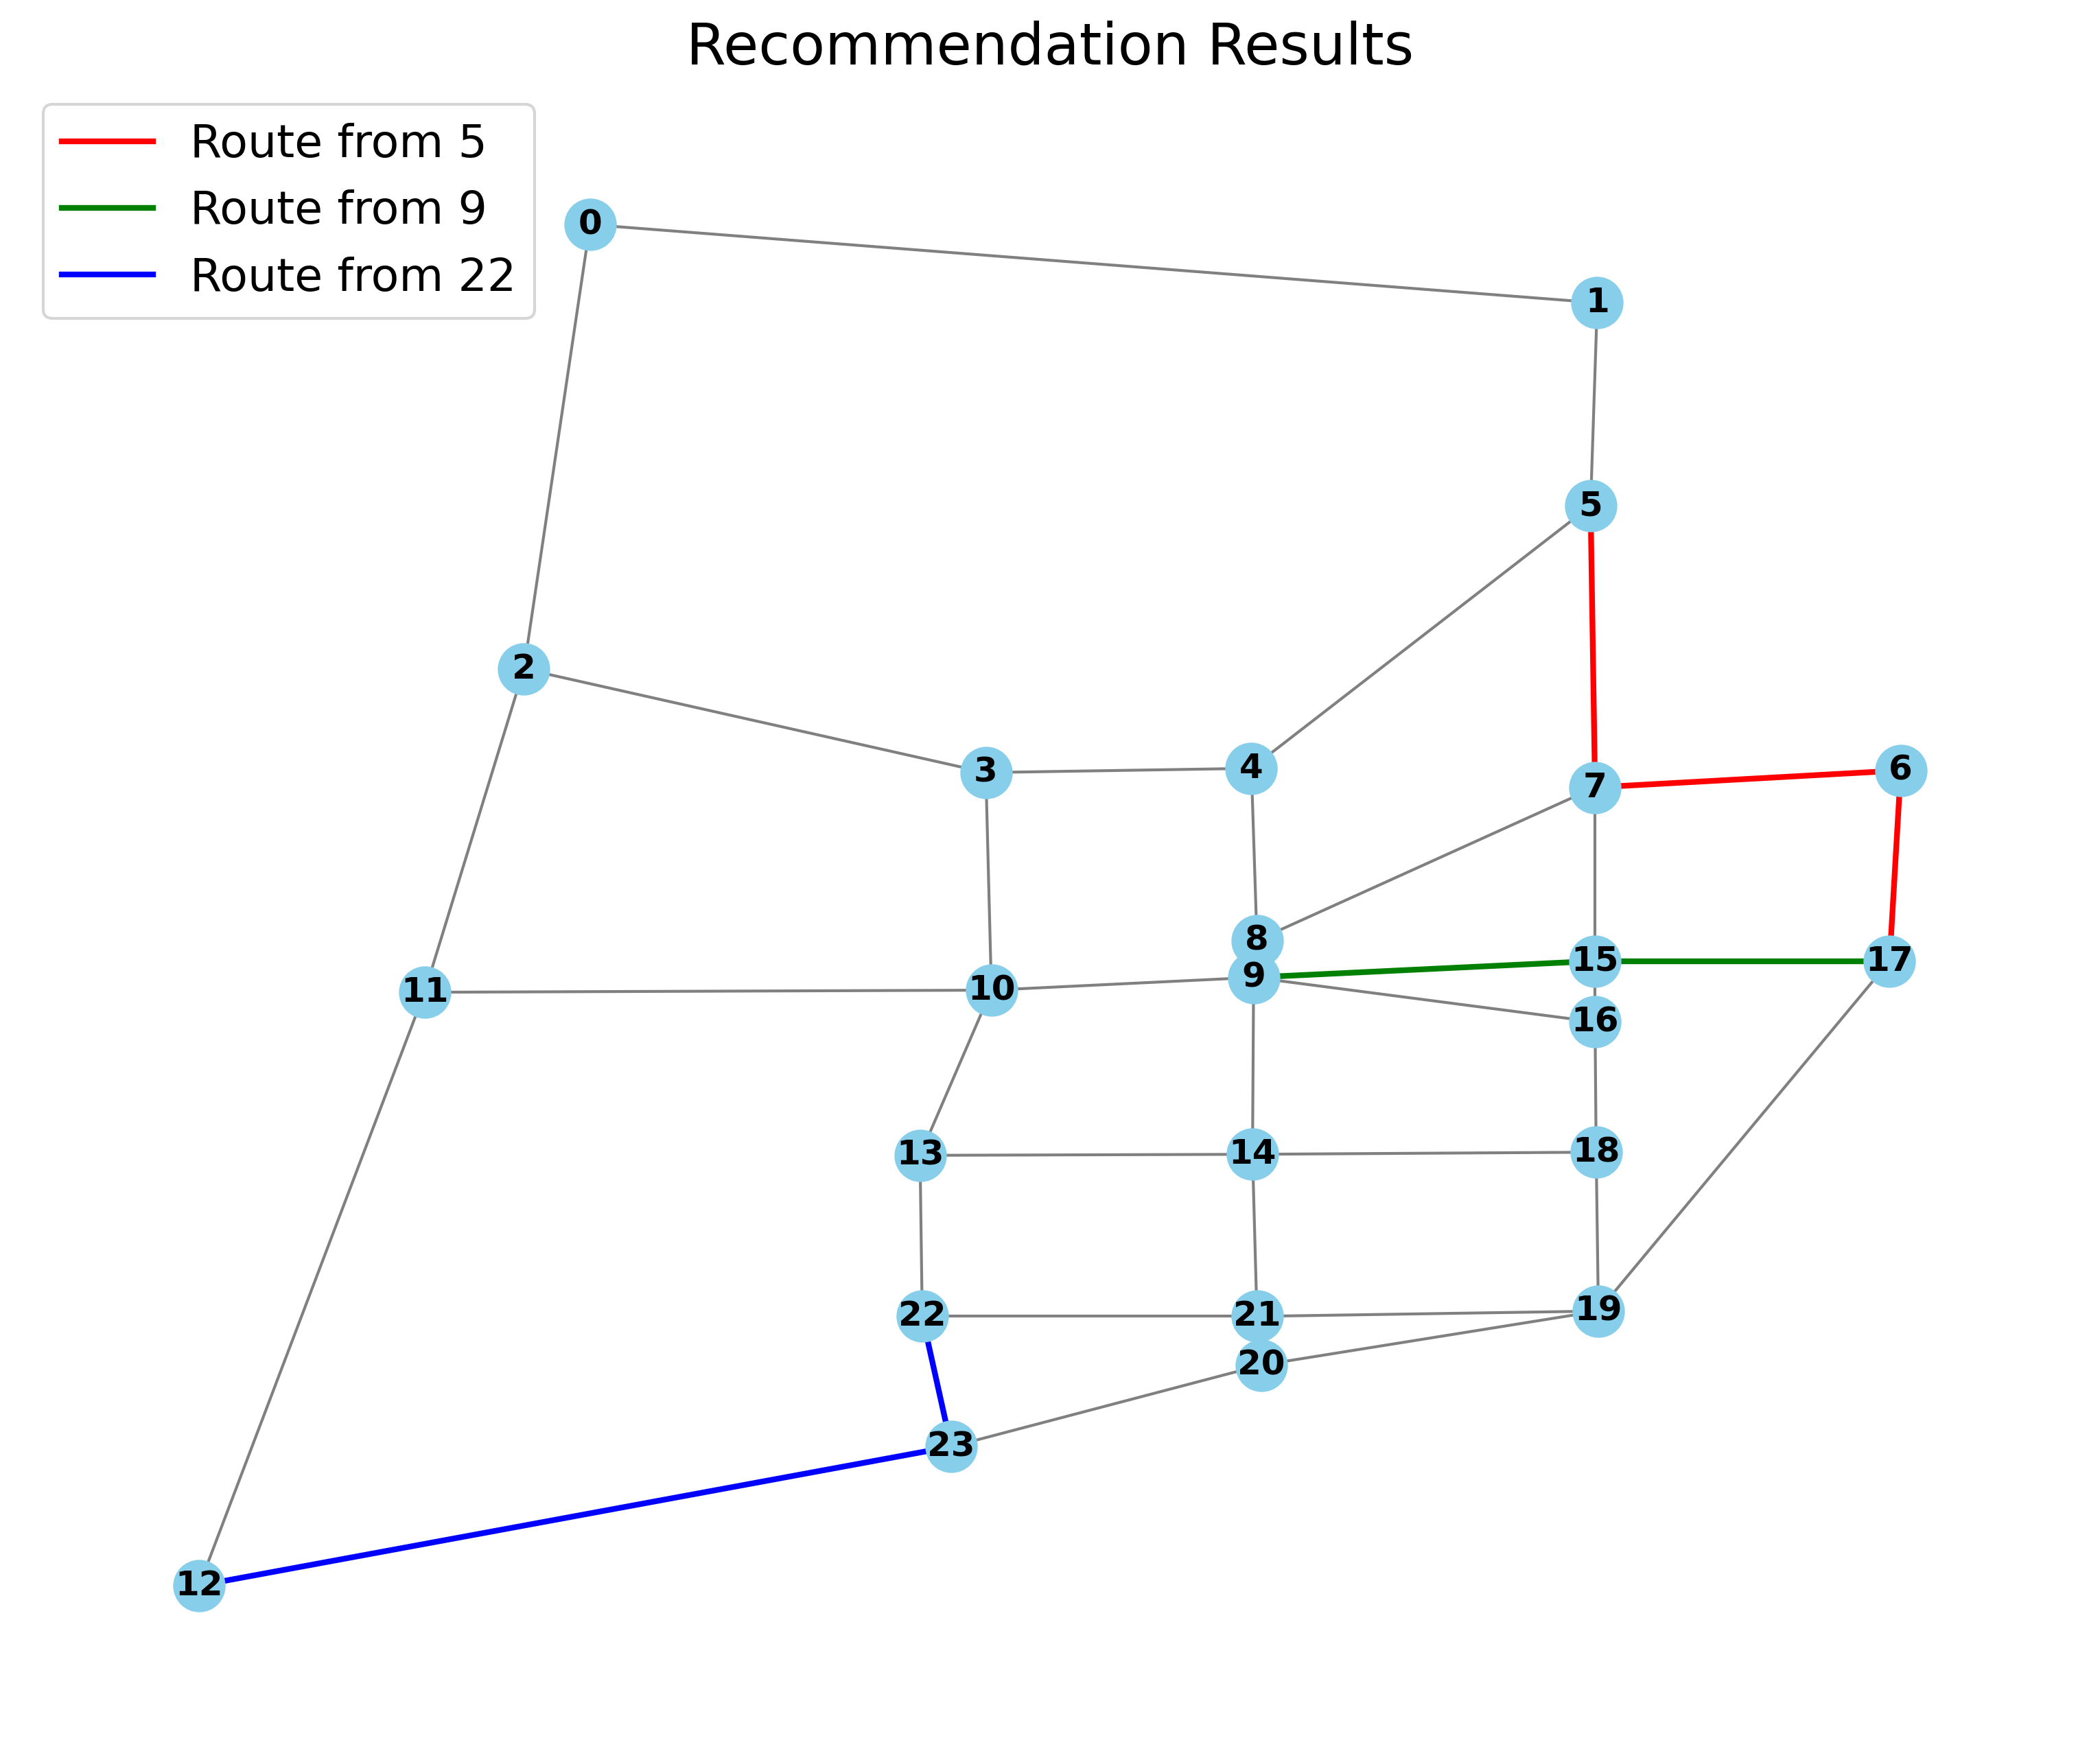

In [38]:
fig = algorithm_for_game.visualize_recommendation(result['recommended_route'],
                                                  "../TransportationNetworks/SiouxFalls/SiouxFalls_node.tntp", arc_set)
fig.show()

In [45]:
print("Total time (s): ", time_end - time_start)

Total time (s):  4.195175886154175


### Future testing case
Add optional parameters

In [35]:
result_future = algorithm_for_game.get_recommended_route(arc_set, origin_node, dest_node, num_nodes, trust, demand,
                                                  free_flow_time, capacity=cur_capacity, bpr_params=bpr_params,
                                                  required_explore=explore, eta=eta, report_threshold=report_threshold,
                                                  num_dangerous_reports=num_dangerous_reports)

Solve the optimization model to get optimal recommendation with weight on exploration.
{(5, 7): [5], (7, 6): [5], (6, 17): [5], (9, 15): [9], (15, 17): [9], (22, 23): [22], (23, 12): [22]}
Add flow variance objective
Find recommended route from optimized flow


### (Optional) Simple testing case
In case the computing time of our algorithm is too long, we define a simple function to directly return the shortest
path while taking the update of arc set into consideration.

In [39]:
result_simple = algorithm_for_game.get_recommended_route_simple(arc_set, origin_node, dest_node, trust, free_flow_time,
                                                         report_threshold=report_threshold,
                                                         num_dangerous_reports=num_dangerous_reports)

In [40]:
result_simple['recommended_route']


{5: [5, 7, 6, 17], 9: [9, 15, 17], 22: [22, 23, 12]}